## Preprocessing

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import nan as NA
import re

In [35]:
googlePlay = pd.read_excel('GooglePlaystore.xlsx')
rowsToDrop = googlePlay[googlePlay['Reviews'] == '3.0M'].index
for i in rowsToDrop:
    googlePlay.drop(i, inplace = True)
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [36]:
columns = (googlePlay == 'Varies with device').any()
columns = columns[columns == True].index
for col in columns:
    rowsToDrop = googlePlay[googlePlay[col] == 'Varies with device'].index
    for row in rowsToDrop:
        googlePlay.drop(row, inplace = True)
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


In [37]:
def patternMatching(x):
    if pd.isnull(x):
        return x
    return re.match('([0-9]+\.?[0-9]+)',str(x)).group()
googlePlay['Android Ver'] = googlePlay['Android Ver'].apply(lambda x: patternMatching(x))
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [38]:
def removePlus(x):
    if x[-1] == '+':
        x = x[:-1]
    return x
googlePlay['Installs'] = googlePlay['Installs'].apply(lambda x: str(x).replace(',', ''))
googlePlay['Installs'] = googlePlay['Installs'].apply(lambda x: removePlus(x))
toDrop = googlePlay['Installs'].apply(lambda x: x.isnumeric())
delete = toDrop[toDrop == False].index
for i in delete:
    googlePlay.drop(i, inplace = True)
googlePlay['Installs'] = googlePlay['Installs'].astype(int)
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [39]:
temp = googlePlay[googlePlay['Rating'].isnull()]
temp2 = temp[temp['Reviews'] < 100]
toDelete = temp2[temp2['Installs'] < 50000].index
for i in toDelete:
    googlePlay.drop(i,inplace = True)
temp = googlePlay[googlePlay['Rating'].isnull()].index
grouped = googlePlay.groupby('Category')['Rating'].mean()
for i in temp:
    googlePlay.loc[i,'Rating'] = grouped[googlePlay.loc[i,'Category']]
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [40]:
def applySize(x):
    if str(x)[-1] == 'M':
        x = x[:-1]
        x = float(x) * 1000000
        return(int(x))
    elif str(x)[-1] == 'k':
        x = x[:-1]
        x = float(x) * 1000
        return(int(x))
    else:
        return(int(x))
googlePlay['Size'] = googlePlay['Size'].apply(lambda x: applySize(x))
googlePlay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582000,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


## Analysis

In [41]:
group = googlePlay.groupby('Category')
group['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358621,0.365322,3.2,4.100,4.400000,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.250000,4.500,4.9
BEAUTY,40.0,4.291892,0.356175,3.1,4.075,4.300000,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320139,0.453084,2.7,4.100,4.400000,4.600,5.0
BUSINESS,246.0,4.119184,0.662586,1.0,3.825,4.300000,4.500,5.0
COMICS,49.0,4.154167,0.550363,2.8,3.800,4.400000,4.600,5.0
COMMUNICATION,210.0,4.100957,0.502624,1.0,3.900,4.200000,4.400,5.0
DATING,174.0,3.957803,0.664204,1.0,3.600,4.100000,4.400,5.0
EDUCATION,110.0,4.392661,0.254395,3.5,4.300,4.400000,4.600,4.9


In [42]:
googlePlay['Reviews'] = googlePlay['Reviews'].astype(int)
freeDF = googlePlay[googlePlay['Type'] == 'Free']
def top3(numCol):
    out = freeDF.nlargest(3,numCol)
    out = out[['Category','App', numCol]]
    return out
print(top3('Rating'))
print(top3('Installs'))
print(top3('Reviews'))

    Category                            App  Rating
329   COMICS   Hojiboy Tojiboyev Life Hacks     5.0
612   DATING  American Girls Mobile Numbers     5.0
615   DATING                   Awake Dating     5.0
     Category             App    Installs
1654     GAME  Subway Surfers  1000000000
1700     GAME  Subway Surfers  1000000000
1750     GAME  Subway Surfers  1000000000
     Category             App   Reviews
1879     GAME  Clash of Clans  44893888
1670     GAME  Clash of Clans  44891723
1704     GAME  Clash of Clans  44891723


In [43]:
paidApps = googlePlay[googlePlay['Type'] == 'Paid']
averagePrice = paidApps['Price'].mean()
print('Average Price: ',averagePrice)
maxPrice = paidApps['Price'].max()
print('Max Price: ', maxPrice)
minPrice = paidApps['Price'].min()
print('Min Price: ', minPrice)

Average Price:  15.139163763066062
Max Price:  400
Min Price:  0.99


## Visualization

In [55]:
from matplotlib import pyplot as plt

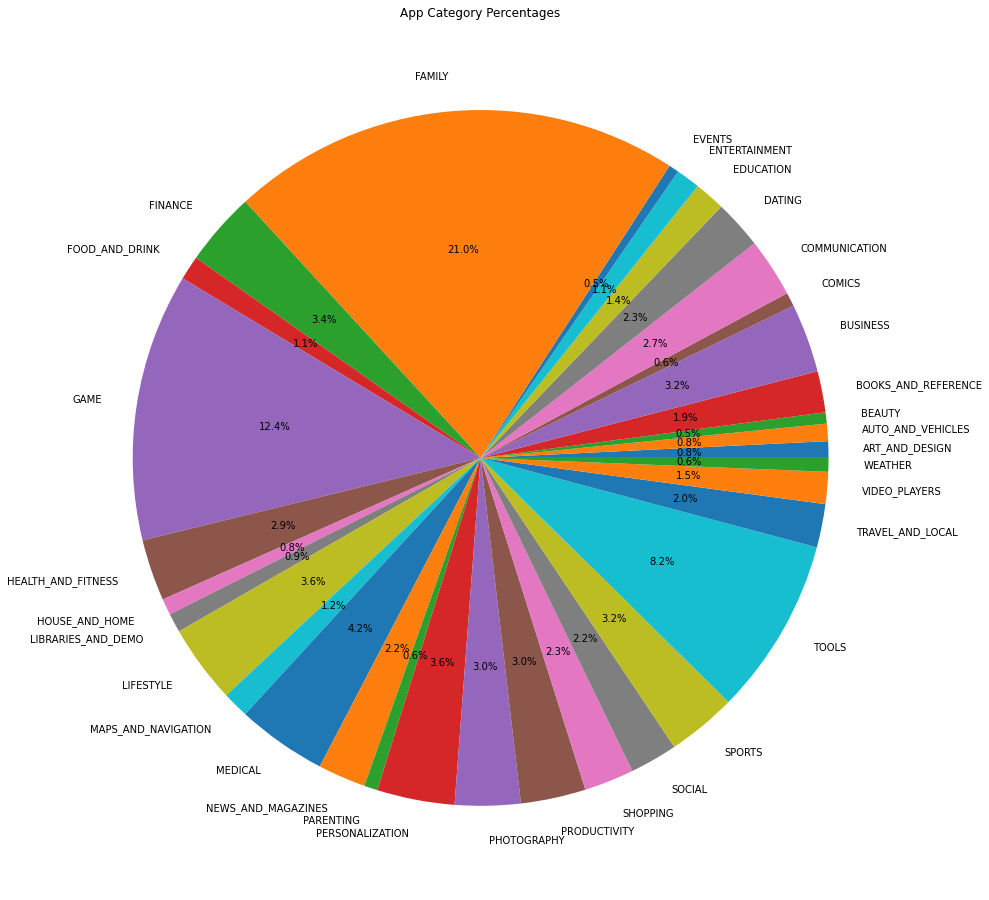

In [104]:
googlePlay = googlePlay.explode('Category')
cats = googlePlay.groupby('Category')['App'].count()
nameLst = []
for name in cats.keys():
    nameLst += name.split(' ')
plt.figure(figsize=(16,16))
plt.title('App Category Percentages', fontsize = 12)
plt.pie(cats,labels = nameLst, autopct = '%1.1f%%')
plt.show()

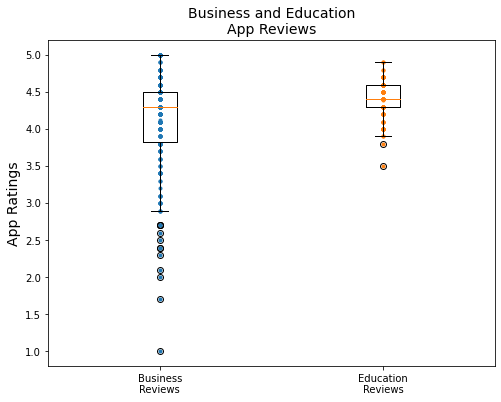

In [109]:
business = googlePlay[googlePlay['Category'] == 'BUSINESS']['Rating']
education = googlePlay[googlePlay['Category'] == 'EDUCATION']['Rating']
plt.figure(figsize = (8,6))
plt.plot([1]*business.count(), business.values, '.')
plt.plot([2]*education.count(), education.values, '.')
plt.boxplot([business.values, education.values], labels = ('Business\nReviews', 'Education\nReviews'))
plt.ylabel('App Ratings', fontsize = 14)
plt.title('Business and Education\nApp Reviews', fontsize = 14)
plt.show()